In [1]:
from __future__ import print_function
import sys
import os
import time
import csv
import math
import random
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import pickle
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import tensorflow as tf
from tensorflow.contrib.layers.python import layers as tf_layers
from FunGenerator import FunGenerator
from sklearn.neighbors import DistanceMetric
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
path = '/media/rspace/WanChai/Dropbox/TSOTHOUGHTS/Tensorflow-CODE/maml_ht/FitFunShapes/'
home = '/home/rspace/dropb/TSOTHOUGHTS/Tensorflow-CODE/maml_ht/'
fnm = 'Param-4STARTS-and-MeanInit-39funs.pkl'
fnm = 'Param-2STARTS-and-MeanInit-20funs.pkl'
fnm = 'Param-3STARTS-and-MeanInit-39funs.pkl'
fnm = 'Param-Fixed-w1w2-1Start.pkl'
fnm = 'GradientPath_result.pkl'
fnm = 'PerturbGradientPaths_result.pkl'
fnm = 'PerturbGradientPaths_sigma=0.2_result.pkl'
os.chdir(home)

# Gradient Path Perturbataion Study :

### The goal of the study is to see if there's a relationship between a change in the initialization of a neural network model and the delta of the final solutions they reached from two slightly different starting points.

### First, a randomly generated parameter vector is fixed as a baseline for comparison. I run gradient descent from this initialization until a loss threshold is met, record the final parameters and the length of the path. Then, I apply a small perturbation on the initial parameters, do same run until the threshold is met, record the parameters. I call these the perturbed final parameters. I calculated the amount of initial perturbation, as measured by the L1-norm, and the perturbation in the final state as measured by the L1-norm between the original final parameters and the perturbed final parameters. 



# Hyperparameters used :
### sigma = 0.20 (stdev on the perturbation noise)
### Hn = [20,20], Lambda = 0.0, Ntrain = 50, loss_thres = 5.0, learning_rate = 1e-3

### script : FitFun.py -- PerturbGradPaths()

In [12]:
with open(home + fnm, 'rb') as f:
    xx = pickle.load(f)
    INIT = xx['INIT']
    xx = pickle.load(f)
    PARAM = xx['PARAM']
    xx = pickle.load(f)
    LOSS_PATH = xx['LOSS_PATH']
    xx = pickle.load(f)
    ITER = xx['ITER']
    xx = pickle.load(f)
    PATH_LEN = xx['PATH_LEN']
    xx = pickle.load(f)
    DIST_BTWN_INIT = xx['DIST_BTWN_INIT']
    xx = pickle.load(f)
    DIST_BTWN_FINAL = xx['DIST_BTWN_FINAL']

In [22]:
print(len(LOSS_PATH))
print(len(LOSS_PATH[0]))
print(len(DIST_BTWN_INIT))
print(DIST_BTWN_INIT)
print(DIST_BTWN_FINAL)
print('ITER : ', [float(x)/100000 for x in ITER])

10
74751
10
[78.4727641175152, 76.37222455553629, 80.68432294075185, 76.31220965234311, 79.61609584484123, 76.57290703307858, 83.34108909724523, 76.96277422995409, 74.92708179698272, 78.57094422689568]
[703.72266, 692.89014, 845.55646, 673.89886, 692.7977, 692.02686, 678.82184, 713.6857, 656.5908, 661.3928]
ITER :  [0.7475, 0.76392, 3.86961, 0.91229, 1.16238, 1.33305, 0.99199, 0.89164, 0.86574, 0.99798]


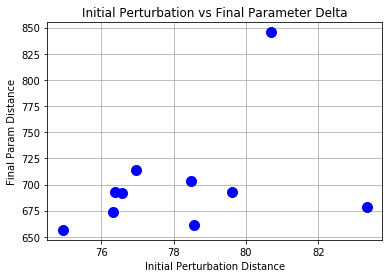

In [21]:
plt.plot(DIST_BTWN_INIT, DIST_BTWN_FINAL, 'o', markersize=10, color='blue')
#plt.scatter(DIST_BTWN_INIT, DIST_BTWN_FINAL)
plt.grid(True)
plt.title('Initial Perturbation vs Final Parameter Delta')
plt.xlabel('Initial Perturbation Distance')
plt.ylabel('Final Param Distance')
plt.show()

## NOTE : Interpretation of this outlier at (80.68, 845.55). A moderately large perturbation at the initialization could lead to a solution that's very different from the typical solution. This suggests that there are probably many optimal parameters that could yield a similar or smaller loss. 

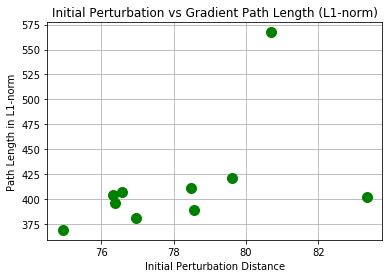

In [16]:
plt.plot(DIST_BTWN_INIT, PATH_LEN, 'o', markersize=10, color='green')
plt.grid(True)
plt.title('Initial Perturbation vs Gradient Path Length (L1-norm)')
plt.xlabel('Initial Perturbation Distance')
plt.ylabel('Path Length in L1-norm')
plt.show()

# Observation :

## There is no discernable relationship between the size of the initial perturbation and the delta of the final parameters. The figure above shows that initial changes could be small (20) or large (60), and the final parameters tend to land around a close proximity of the unperturbed solution. 

## The Initial Perturbation Distance is defined as the L1-norm distance between the fixed initial parameters and the paramters with gaussian noise added. The Final Parameter Distance is the L1-norm between the solution reached by the fixed initial parameters and that of the final parameters from the perturbed initial point. The Path Length is defined as the L1-distance between the starting and ending parameters.

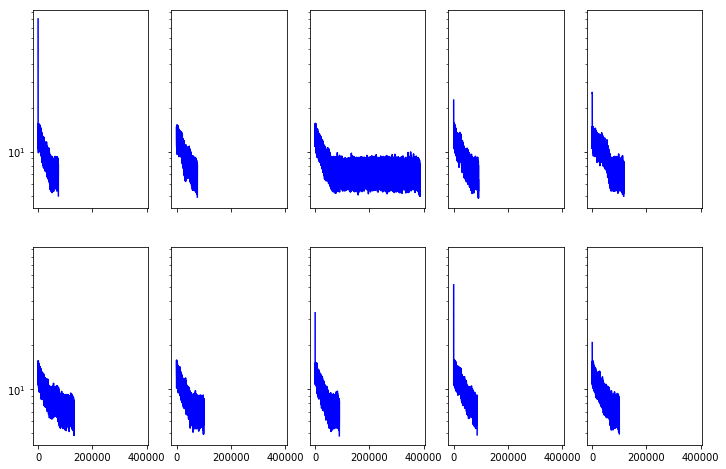

In [17]:
f, ax = plt.subplots(2, 5,  sharey=True, sharex=True, figsize=(12,8))
ax[0,0].semilogy(LOSS_PATH[0], '-', color='blue')
ax[0,1].semilogy(LOSS_PATH[1], '-', color='blue')
ax[0,2].semilogy(LOSS_PATH[2], '-', color='blue')
ax[0,3].semilogy(LOSS_PATH[3], '-', color='blue')
ax[0,4].semilogy(LOSS_PATH[4], '-', color='blue')
ax[1,0].semilogy(LOSS_PATH[5], '-', color='blue')
ax[1,1].semilogy(LOSS_PATH[6], '-', color='blue')
ax[1,2].semilogy(LOSS_PATH[7], '-', color='blue')
ax[1,3].semilogy(LOSS_PATH[8], '-', color='blue')
ax[1,4].semilogy(LOSS_PATH[9], '-', color='blue')
plt.show()

# Observation :

## Run 8 takes a significantly more iterations to reach the same loss threshold. However, notice that it has gotten very close to the loss target within the first ~80000 iterations, but it just fluctuates around that level for a long time without getting any better. 

# END

In [3]:
with open(home + fnm, 'rb') as f:
    xx = pickle.load(f)
    PARAM = xx['PARAM']
    xx = pickle.load(f)
    LOSS_PATH = xx['LOSS_PATH']
    xx = pickle.load(f)
    iParam = xx['iParam']

In [6]:
W11, W21, W31, b11, b21, b31 = PARAM[0]
W12, W22, W32, b12, b22, b32 = PARAM[1]
print(W11.shape)
print(W21.shape)
print(W31.shape)
print(b11.shape)
print(b21.shape)
print(b31.shape)

(1, 20)
(20, 20)
(20, 1)
(1, 20)
(1, 20)
(1, 1)


In [8]:
W1_del = np.sum(W11.flatten() - W12.flatten())
W2_del = np.sum(W21.flatten() - W22.flatten())
W3_del = np.sum(W31.flatten() - W32.flatten())
b1_del = np.sum(b11.flatten() - b12.flatten())
b2_del = np.sum(b21.flatten() - b22.flatten())
b3_del = np.sum(b31.flatten() - b32.flatten())

print('W1 delta :', W1_del)
print('W2 delta :', W2_del)
print('W3 delta :', W3_del)
print('b1 delta :', b1_del)
print('b2 delta :', b2_del)
print('b3 delta :', b3_del)

W1 delta : 0.0
W2 delta : 0.0
W3 delta : 0.0
b1 delta : 0.0
b2 delta : 0.0
b3 delta : 0.0


In [113]:
with open(home + fnm, 'rb') as f:
    xx = pickle.load(f)
    Fun_Subset = xx['Fun_Subset']
    xx = pickle.load(f)
    PARAM_START = xx['PARAM_START']
    
    xx = pickle.load(f)
    PARAM = xx['PARAM']
    xx = pickle.load(f)
    DIST = xx['DIST']  
    xx = pickle.load(f)
    LOSS_TRAIN = xx['LOSS_TRAIN']  
    xx = pickle.load(f)
    LOSSVALID = xx['LOSSVALID']  
    
    xx = pickle.load(f)
    PARAMave = xx['PARAMave']
    xx = pickle.load(f)
    DISTave = xx['DISTave']  
    xx = pickle.load(f)
    LOSS_TRAINave = xx['LOSS_TRAINave']  
    xx = pickle.load(f)
    LOSSVALIDave = xx['LOSSVALIDave']  
    
    xx = pickle.load(f)
    colmean = xx['colmean']  
    
    xx = pickle.load(f)
    Hn = xx['Hn']  
    xx = pickle.load(f)
    Grid = xx['Grid']  
    xx = pickle.load(f)
    funX = xx['funX']  
    xx = pickle.load(f)
    funY = xx['funY']  
    xx = pickle.load(f)
    Lambda = xx['Lambda']  
    xx = pickle.load(f)
    loss_threshold = xx['loss_threshold']  
    xx = pickle.load(f)
    Ntrain = xx['Ntrain']      
    xx = pickle.load(f)
    Nval = xx['Nval']     
    xx = pickle.load(f)
    max_iter = xx['max_iter']    
    xx = pickle.load(f)
    min_iter = xx['min_iter']

In [114]:
print('Fun subset len:', len(Fun_Subset))
print('Fun subset :', Fun_Subset)     

print('PARAM_START len :',len(PARAM_START))
print('[0] len :', len(PARAM_START[0]))
print(PARAM_START[0][0].shape)
print(PARAM_START[0][1].shape)
print(PARAM_START[1][0].shape)
print(PARAM_START[1][1].shape)
print(PARAM_START[2][0].shape)
print(PARAM_START[2][1].shape)
print(PARAM_START[3][0].shape)
print(PARAM_START[3][1].shape)

print('PARAM len :',len(PARAM))
print('[0] len :', len(PARAM[0]))
print('[0][0] len :', len(PARAM[0][0]))

print('DIST len :',len(DIST))
print(len(DIST[0]))

print('LOSS_TRAIN len :',len(LOSS_TRAIN))
print('[0] len :', len(LOSS_TRAIN[0]))
print('[0][0] len :', len(LOSS_TRAIN[0][0]))

print('LOSSVALID len :')
print(len(LOSSVALID))
print('[0] len :', len(LOSSVALID[0]))

print('colmean shape:\n',colmean.shape)

Fun subset len: 16
Fun subset : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
PARAM_START len : 6
[0] len : 1
(1, 20)


IndexError: list index out of range

In [132]:
print(Grid.shape)
print(Grid.iloc[:20])

(16, 4)
     w1   w2       ph1       ph2
0   0.1  0.9  0.314159  1.256637
1   0.1  0.9  0.314159  1.780236
2   0.1  0.9  0.314159  2.303835
3   0.1  0.9  0.314159  2.827433
4   0.1  0.9  0.837758  1.256637
5   0.1  0.9  0.837758  1.780236
6   0.1  0.9  0.837758  2.303835
7   0.1  0.9  0.837758  2.827433
8   0.1  0.9  1.361357  1.256637
9   0.1  0.9  1.361357  1.780236
10  0.1  0.9  1.361357  2.303835
11  0.1  0.9  1.361357  2.827433
12  0.1  0.9  1.884956  1.256637
13  0.1  0.9  1.884956  1.780236
14  0.1  0.9  1.884956  2.303835
15  0.1  0.9  1.884956  2.827433


In [118]:
len(LOSS_TRAIN[0])

16

In [119]:
N_init = len(LOSS_TRAIN)
N_fun = len(LOSS_TRAIN[0])
print('N_init :', N_init)
print('N_fun :', N_fun)
Loss_mat = np.zeros((N_fun, N_init))
for i in range(N_init):
    tmp = LOSS_TRAIN[i]
    loss_last = [ll[-1] for ll in tmp]
    Loss_mat[:,i] = loss_last
print(Loss_mat)

N_init : 1
N_fun : 16
[[0.81753772]
 [0.83505321]
 [1.10961962]
 [1.03445041]
 [2.8849051 ]
 [1.01385152]
 [1.07683396]
 [2.18199587]
 [0.90736067]
 [1.83661187]
 [0.96212637]
 [0.71987647]
 [1.27375698]
 [0.74264467]
 [0.85665047]
 [1.07880259]]


In [120]:
LossAve_mat = np.zeros((N_fun, N_init))
for i in range(N_init):
    tmp = LOSS_TRAINave[i]
    val = [ll[-1] for ll in tmp]
    LossAve_mat[:,i] = val
print(LossAve_mat)

[[0.94515026]
 [0.89197803]
 [0.52150536]
 [0.8172285 ]
 [1.05861318]
 [0.93948323]
 [0.97971666]
 [0.90442586]
 [0.65922534]
 [1.08978951]
 [0.76062202]
 [0.83434802]
 [0.8113054 ]
 [0.74967003]
 [0.74248064]
 [0.95809591]]


In [121]:
Loss_mat1 = np.hstack((Loss_mat, LossAve_mat))
print(Loss_mat1)
# Column 1-3 are three fits starting from random initializations, column 4-6 are 
# fits starting from the mean parameters of the previous three fits. 
# Rows are the functional shapes. For ex. row one is generated by
#
#      w1   w2       ph1       ph2
#     0.1  0.9  0.314159  1.256637
#
# Since the third column is the model that starts from the mean of 
# two sets of converged parameters, it should yield a better model 
# the mean parameters should be closer to the optimum than the random
# start points, but....

[[0.81753772 0.94515026]
 [0.83505321 0.89197803]
 [1.10961962 0.52150536]
 [1.03445041 0.8172285 ]
 [2.8849051  1.05861318]
 [1.01385152 0.93948323]
 [1.07683396 0.97971666]
 [2.18199587 0.90442586]
 [0.90736067 0.65922534]
 [1.83661187 1.08978951]
 [0.96212637 0.76062202]
 [0.71987647 0.83434802]
 [1.27375698 0.8113054 ]
 [0.74264467 0.74967003]
 [0.85665047 0.74248064]
 [1.07880259 0.95809591]]


In [122]:
# ....that's not true:
print(np.sum(Loss_mat1[:,1] < Loss_mat1[:,0]) / N_fun)
#print(np.sum(Loss_mat1[:,3] < Loss_mat1[:,0]) / N_fun)
#print(np.sum(Loss_mat1[:,4] < Loss_mat1[:,1]) / N_fun)
#print(np.sum(Loss_mat1[:,5] < Loss_mat1[:,2]) / N_fun)
# RESULTS :
#
# When the training losses are compared, approx 75% of the models starting from the mean of
# a previous get a better fit. That is to say, by averaging the Weights and biases of all 20
# functional shapes and use that as the initialization, the new 20 fits are better than those
# starting from random initialization. 
#
# Those do worse aren't usually off by much. Conclusion seems to be that just moving the start
# point to the center of fits that include a wide variety of functional shapes, we could do
# a little better than starting from random.
#
# However, this is not a sure thing. Sometimes those starting points would lead to worse fit
# thanks to the highly non-convex landscape in the parameter space. 
#


0.75


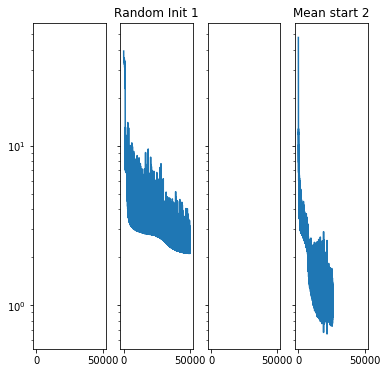

In [128]:
# :::: VIZ ::::::::::::::::::::::::::::::::::::::::::::::::::::
# compare the trajectory of the three runs, same function shape
i = 7
f, ax = plt.subplots(1,4,sharey=True, sharex=True, figsize=(6,6))
#ax[0].semilogy(LOSS_TRAIN[1][i])
#ax[0].set_title('Random Init 2')
ax[1].semilogy(LOSS_TRAIN[0][i])
ax[1].set_title('Random Init 1')
#ax[2].semilogy(LOSS_TRAINave[1][i])
#ax[2].set_title('Mean start 1')
ax[3].semilogy(LOSS_TRAINave[0][i])
ax[3].set_title('Mean start 2')
plt.show()

In [129]:
x1 = np.array(DIST).T
x1.shape

(16, 1)

In [130]:
mat = np.hstack((np.array(DIST).T, np.array(DISTave).T))
print(mat.shape)
print(mat)

(16, 2)
[[11.737238  11.001941 ]
 [16.542353   9.09295  ]
 [10.490139   9.864573 ]
 [10.145106   8.826476 ]
 [ 9.403513   9.784985 ]
 [12.715537   8.335846 ]
 [10.927881   7.387473 ]
 [16.818573  11.071605 ]
 [ 7.3684487  8.719578 ]
 [ 7.5029488  7.2919507]
 [ 7.551224   7.0617886]
 [ 8.455716   6.1079535]
 [12.116711   8.792564 ]
 [11.278513   9.884256 ]
 [11.805957   7.497057 ]
 [11.794526   8.3279085]]


In [131]:
print(np.sum(mat[:,1] < mat[:,0]) / mat.shape[0])
#print(np.sum(mat[:,3] < mat[:,0]) / mat.shape[0])
#print(np.sum(mat[:,4] < mat[:,1]) / mat.shape[0])
#print(np.sum(mat[:,5] < mat[:,2]) / mat.shape[0])
# RESULTS : 
#
# DIST is the distance the parameter vector travels from start to end of run. 
# The larger this measure, the 'farther' the solution lies, and supposedly
# the harder it is to find a good fit for the given data. 
# 
# If the distance from the mean-parameter start is farther away than the random
# start, that means the mean position is no good. It won't help the optimization
# algorithm to look for good solution.
#
# The results here show mean-start is only helpful around 55% of the time. So 
# there's some advantage, but not a lot.

0.875


In [24]:
FG = FunGenerator(num_pts=0, batch_size=0, randomize=False)
Xtr, Ytr, _, _ = FG.generate(num_pts=20, batch_size=1, x_range=[0,10], randomize=False, train=False, add_noise=True, noise_sd=0.1)

In [36]:
print(Xtr.shape)
Xtr1 = np.reshape(Xtr, newshape=(Xtr.shape[0], Xtr.shape[1]))
Ytr1 = np.reshape(Ytr, newshape=(Ytr.shape[0], Ytr.shape[1]))
print(Xtr1.shape)
print(Xtr1)

(1, 20, 1)
(1, 20)
[[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
   3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
   6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
   9.47368421 10.        ]]


In [37]:
xx = np.tile(Xtr1, [3,1])
yy = np.tile(Ytr1, [3,1])
print(xx.shape)
print(xx)

(3, 20)
[[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
   3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
   6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
   9.47368421 10.        ]
 [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
   3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
   6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
   9.47368421 10.        ]
 [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
   3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
   6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
   9.47368421 10.        ]]


In [38]:
ep = np.random.normal(loc=0, scale=0.1, size=(3,20))
print(ep)
#print(yy)
yy1 = yy + ep
#print(yy1)

[[-0.10804026 -0.08023553 -0.08311942  0.08528872 -0.03119751 -0.10785714
   0.09469475 -0.01584748 -0.11993178 -0.05666341 -0.13430085 -0.10430105
   0.02509292  0.06471328 -0.02460082  0.06211349  0.06270288  0.09925144
  -0.13130065 -0.09990359]
 [ 0.18723012 -0.0886331  -0.00141696  0.09337555  0.07875763 -0.07114382
  -0.14786672  0.14009362 -0.16466223  0.15605639  0.17264529  0.21378744
   0.08303913  0.07514962  0.13346671 -0.08626884 -0.02070007  0.08147987
   0.13614567 -0.09354735]
 [-0.00298125  0.06784322 -0.1655036   0.05664997 -0.10891101  0.05232065
   0.11231289 -0.14721632  0.04057793 -0.0547096  -0.11974236  0.0413515
   0.13589101  0.11384966  0.03048228 -0.12927159 -0.0551542   0.04645981
  -0.06924456  0.09881705]]


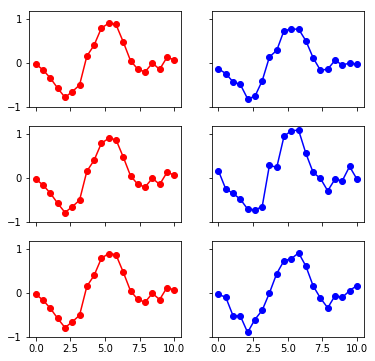

In [39]:
f, ax = plt.subplots(3,2,sharey=True, sharex=True, figsize=(6,6))
ax[0,0].plot(xx[0,:], yy[0,:], "-o", color="red")
ax[0,1].plot(xx[0,:], yy1[0,:], "-o", color="blue")
ax[1,0].plot(xx[1,:], yy[1,:], "-o", color="red")
ax[1,1].plot(xx[1,:], yy1[1,:], "-o", color="blue")
ax[2,0].plot(xx[2,:], yy[2,:], "-o", color="red")
ax[2,1].plot(xx[2,:], yy1[2,:], "-o", color="blue")


In [40]:
xx = np.arange(5)
print(xx)
xx[-3:]
print(1e-2)

[0 1 2 3 4]
0.01


In [2]:
def getWeights(d, size):
    w=[1.0]
    for k in range(1, size):
        w_ = - w[-1] / k*(d-k+1)
        w.append(w_)
    w = np.array(w[::-1]).reshape(-1,1)
    return w


In [4]:
w = getWeights(1.5, 10)
print(w)

[[ 0.00218201]
 [ 0.00302124]
 [ 0.00439453]
 [ 0.00683594]
 [ 0.01171875]
 [ 0.0234375 ]
 [ 0.0625    ]
 [ 0.375     ]
 [-1.5       ]
 [ 1.        ]]


In [5]:
# THIS KIND OF THINGS SHOULD BE MADE INTO R
xx = [1,2,4,3,2,4,3,1,34,21,22,11]
print(xx[-1]) # last data
print(xx[-2]) # next to the last
print(xx[:-1]) # everything exclude the last data
print(xx[:-2]) # everything except the last two data
print(xx[-3:]) # last three data

11
22
[1, 2, 4, 3, 2, 4, 3, 1, 34, 21, 22]
[1, 2, 4, 3, 2, 4, 3, 1, 34, 21]
[21, 22, 11]
